In [95]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
data_llm = {
    "LLM-Based Metrics": [
        "L_rate", "L_nonword", "C_rate", "C_outlier", "R_rate", "R_duplicate",
        "D_rate", "A_ir-tw", "A_missing-theme"
    ],
    "LDA-20NG": [2.80725, 0.571875, 2.225125, 1.903125, 2.095375, 1.965, 2.6628125, 6.5609375, 5.7705625],
    "ProdLDA-20NG": [2.497, 1.33, 2.094375, 2.204375, 2.1225, 2.11375, 2.63725, 6.5113125, 5.7845625],
    "CombineTM-20NG": [2.713875, 0.81, 2.278, 2.045, 2.0735, 2.013125, 2.702375, 6.5571875, 5.4355625],
    "BERTopic-20NG": [2.8574375, 0.5309375, 2.474875, 1.631375, 1.9365, 2.1971875, 2.807375, 6.670125, 7.1518125],
    "LDA-AGRIS": [2.8565, 0.59125, 2.522625, 1.5786875, 2.067375, 1.844375, 2.632875, 5.3293125, 6.0743125],
    "ProdLDA-AGRIS": [2.875875, 0.460625, 2.786375, 1.5214375, 1.943125, 2.170625, 2.6495, 5.4103125, 5.438375],
    "CombineTM-AGRIS": [2.887125, 0.53875, 2.71875, 1.7065625, 1.98125, 2.1775, 2.64075, 5.2625, 5.3416875],
    "BERTopic-AGRIS": [2.94225, 0.3556875, 2.943625, 1.4700625, 1.8139375, 2.3140625, 2.5988125, 5.389, 5.472125],
    "LDA-TWEETS_NYR": [2.658875, 0.73, 1.834375, 2.0875, 2.2775, 1.748125, 2.5595625, 5.19225, 6.967125],
    "ProdLDA-TWEETS_NYR": [2.481, 1.035, 1.743875, 2.238125, 2.304625, 1.72625, 2.552875, 5.219, 7.0891875],
    "CombineTM-TWEETS_NYR": [2.645375, 0.771875, 1.8955, 2.130625, 2.235125, 1.77, 2.534625, 5.2018125, 6.8105],
    "BERTopic-TWEETS_NYR": [2.5375, 1.1764375, 2.2758125, 1.9875, 1.9096875, 2.1051875, 2.744, 5.2188125, 6.285125],
}

In [97]:
data_all = {
    "LLM-Based Metrics": [
        "L_rate", "L_nonword", "C_rate", "C_outlier", "R_rate", "R_duplicate",
        "D_rate", "A_ir-tw", "A_missing-theme",
        "C_UMASS", "C_NPMI", "C_V", "D_TU", "D_IRBO"
    ],
    "LDA-20NG": [2.80725, 0.571875, 2.225125, 1.903125, 2.095375, 1.965, 2.6628125, 6.5609375, 5.7705625, -3.657, -0.09, 0.4375, 0.625, 0.676],
    "ProdLDA-20NG": [2.497, 1.33, 2.094375, 2.204375, 2.1225, 2.11375, 2.63725, 6.5113125, 5.7845625, -6.5225, -0.045, 0.4885, 0.2625, 0.6735],
    "CombineTM-20NG": [2.713875, 0.81, 2.278, 2.045, 2.0735, 2.013125, 2.702375, 6.5571875, 5.4355625, -5.6175, -0.0505, 0.52, 0.384, 0.681],
    "BERTopic-20NG": [2.8574375, 0.5309375, 2.474875, 1.631375, 1.9365, 2.1971875, 2.807375, 6.670125, 7.1518125, -4.8205, -0.047, 0.543, 0.4815, 0.689],
    "LDA-AGRIS": [2.8565, 0.59125, 2.522625, 1.5786875, 2.067375, 1.844375, 2.632875, 5.3293125, 6.0743125, -2.6785, -4.23425, 0.1935, 0.828, 0.8225],
    "ProdLDA-AGRIS": [2.875875, 0.460625, 2.786375, 1.5214375, 1.943125, 2.170625, 2.6495, 5.4103125, 5.438375, -2.52, -2.2175, 0.35245, 0.686, 0.5065],
    "CombineTM-AGRIS": [2.887125, 0.53875, 2.71875, 1.7065625, 1.98125, 2.1775, 2.64075, 5.2625, 5.3416875, -2.76, -2.1445, 0.3335, 0.6925, 0.5175],
    "BERTopic-AGRIS": [2.94225, 0.3556875, 2.943625, 1.4700625, 1.8139375, 2.3140625, 2.5988125, 5.389, 5.472125, -2.553, -2.1145, 0.3055, 0.552, 0.5855],
    "LDA-TWEETS_NYR": [2.658875, 0.73, 1.834375, 2.0875, 2.2775, 1.748125, 2.5595625, 5.19225, 6.967125, -9.7205, -8.155, 0.0085, 0.785, 0.732],
    "ProdLDA-TWEETS_NYR": [2.481, 1.035, 1.743875, 2.238125, 2.304625, 1.72625, 2.552875, 5.219, 7.0891875, -9.899, -9.401, 0.047, 0.671, 0.604],
    "CombineTM-TWEETS_NYR": [2.645375, 0.771875, 1.8955, 2.130625, 2.235125, 1.77, 2.534625, 5.2018125, 6.8105, -8.888, -9.3335, 0.0395, 0.546, 0.5775],
    "BERTopic-TWEETS_NYR": [2.5375, 1.1764375, 2.2758125, 1.9875, 1.9096875, 2.1051875, 2.744, 5.2188125, 6.285125, -9.2007, -8.56965, 0.0455, 0.814, 0.774],
}

In [98]:
data = data_all

In [99]:
def label_to_math(label):
    if "_" in  label:
        family = label.split('_')[0]
        method = label.split('_')[1]
        output = '$' + family + '_{\mathrm{' + method+ '}}$'
    return output

for i in range(len(data["LLM-Based Metrics"])):
    metric = data["LLM-Based Metrics"][i]
    data["LLM-Based Metrics"][i] = label_to_math(metric)
print(data)

{'LLM-Based Metrics': ['$L_{\\mathrm{rate}}$', '$L_{\\mathrm{nonword}}$', '$C_{\\mathrm{rate}}$', '$C_{\\mathrm{outlier}}$', '$R_{\\mathrm{rate}}$', '$R_{\\mathrm{duplicate}}$', '$D_{\\mathrm{rate}}$', '$A_{\\mathrm{ir-tw}}$', '$A_{\\mathrm{missing-theme}}$', '$C_{\\mathrm{UMASS}}$', '$C_{\\mathrm{NPMI}}$', '$C_{\\mathrm{V}}$', '$D_{\\mathrm{TU}}$', '$D_{\\mathrm{IRBO}}$'], 'LDA-20NG': [2.80725, 0.571875, 2.225125, 1.903125, 2.095375, 1.965, 2.6628125, 6.5609375, 5.7705625, -3.657, -0.09, 0.4375, 0.625, 0.676], 'ProdLDA-20NG': [2.497, 1.33, 2.094375, 2.204375, 2.1225, 2.11375, 2.63725, 6.5113125, 5.7845625, -6.5225, -0.045, 0.4885, 0.2625, 0.6735], 'CombineTM-20NG': [2.713875, 0.81, 2.278, 2.045, 2.0735, 2.013125, 2.702375, 6.5571875, 5.4355625, -5.6175, -0.0505, 0.52, 0.384, 0.681], 'BERTopic-20NG': [2.8574375, 0.5309375, 2.474875, 1.631375, 1.9365, 2.1971875, 2.807375, 6.670125, 7.1518125, -4.8205, -0.047, 0.543, 0.4815, 0.689], 'LDA-AGRIS': [2.8565, 0.59125, 2.522625, 1.5786875, 2.0

In [100]:
# 转换为DataFrame并设置索引
df = pd.DataFrame(data)
df.set_index("LLM-Based Metrics", inplace=True)

# 要反转的指标（越低越好）
need_reverse = ['$L_{\\mathrm{nonword}}$', '$C_{\\mathrm{outlier}}$', '$R_{\\mathrm{duplicate}}$', '$A_{\\mathrm{ir-tw}}$', '$A_{\\mathrm{missing-theme}}$']
to_reverse = [metric for metric in data["LLM-Based Metrics"] if metric in need_reverse]
print(to_reverse)

# 对这些列进行最大值反转（每行自己最大减去自身）
df_rev = df.copy()
for metric in to_reverse:
    max_val = df_rev.loc[metric].max()
    df_rev.loc[metric] = max_val - df_rev.loc[metric]

# 计算相关系数矩阵（基于指标之间的相关性）
corr_matrix = df_rev.T.corr(method='pearson')

['$L_{\\mathrm{nonword}}$', '$C_{\\mathrm{outlier}}$', '$R_{\\mathrm{duplicate}}$', '$A_{\\mathrm{ir-tw}}$', '$A_{\\mathrm{missing-theme}}$']


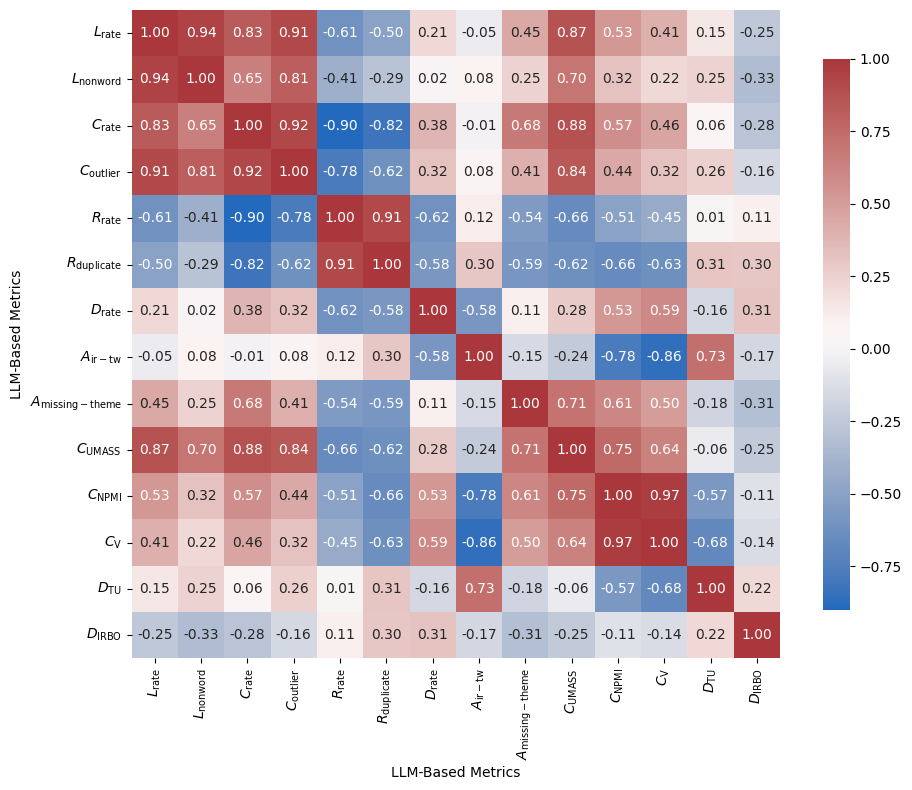

<Figure size 640x480 with 0 Axes>

In [101]:
# 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="vlag", square=True, cbar_kws={"shrink": 0.85})
#plt.title("Correlation Heatmap of LLM-Based Metrics")
plt.tight_layout()
plt.show()
plt.savefig('./fig/correlation_llm_metric.png')
